<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/2023_12_3_402_YOLO_v8s_Mask_3_Classes_Github_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO_v8s Custom Dataset (3 Classes)

* https://github.com/ultralytics/ultralytics

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Custom Data_Set

* 3 Classes

>## 1) wget From Github

* 'maskdataset_3C.tar' 파일 다운로드

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_3C.tara{a,b,c,d,e}

--2023-11-29 04:50:06--  https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_3C.taraa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘maskdataset_3C.taraa’

maskdataset_3C.tara 100%[===================>]  90.00M   281MB/s    in 0.3s    

2023-11-29 04:50:08 (281 MB/s) - ‘maskdataset_3C.taraa’ saved [94371840/94371840]

--2023-11-29 04:50:08--  https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_3C.tarab
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘maskdataset_3C.tarab’

maskdataset_3C.tara 100%[===================>]  90.00M   317MB/s    in 0.3s  

* 현재 작업 경로

In [ ]:
%pwd

'/content'

* 다운로드 결과 확인

In [ ]:
!ls -l

total 408152
-rw-r--r-- 1 root root 94371840 Nov 29 04:50 maskdataset_3C.taraa
-rw-r--r-- 1 root root 94371840 Nov 29 04:50 maskdataset_3C.tarab
-rw-r--r-- 1 root root 94371840 Nov 29 04:50 maskdataset_3C.tarac
-rw-r--r-- 1 root root 94371840 Nov 29 04:50 maskdataset_3C.tarad
-rw-r--r-- 1 root root 40448000 Nov 29 04:50 maskdataset_3C.tarae
drwxr-xr-x 1 root root     4096 Nov 22 14:27 sample_data


>## 2) Unzip

In [ ]:
!cat maskdataset_3C.tar* | tar xf -

* 실행 결과 확인
 - 'yolo_custom_modeling' 디렉토리 생성

In [ ]:
!ls -l

total 408156
-rw-r--r-- 1 root root 94371840 Nov 29 04:50 maskdataset_3C.taraa
-rw-r--r-- 1 root root 94371840 Nov 29 04:50 maskdataset_3C.tarab
-rw-r--r-- 1 root root 94371840 Nov 29 04:50 maskdataset_3C.tarac
-rw-r--r-- 1 root root 94371840 Nov 29 04:50 maskdataset_3C.tarad
-rw-r--r-- 1 root root 40448000 Nov 29 04:50 maskdataset_3C.tarae
drwxr-xr-x 1 root root     4096 Nov 22 14:27 sample_data
drwxr-xr-x 3 root root     4096 Feb  2  2023 yolo_custom_modeling


# II. Train vs. Test Split

* 현재 작업 경로

In [ ]:
!pwd

/content


>## 1) Image Files

In [ ]:
from glob import glob

img_list = glob('/content/yolo_custom_modeling/dataset/images/*.png')

print(len(img_list))

843


>## 2) Label Files

In [ ]:
from glob import glob

txt_list = glob('/content/yolo_custom_modeling/dataset/labels/*.txt')

print(len(txt_list))

843


>## 3) train_test_split( )

* 8:2

In [ ]:
from sklearn.model_selection import train_test_split

train_img_list, valid_img_list = train_test_split(img_list,
                                                test_size = 0.2,
                                                random_state = 2045)

print(len(train_img_list), len(valid_img_list))

674 169


* 목록 확인

In [ ]:
print('Train_Img: ', train_img_list)
print('Valid_Img: ', valid_img_list)

Train_Img:  ['/content/yolo_custom_modeling/dataset/images/maksssksksss288.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss522.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss664.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss14.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss498.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss385.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss115.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss295.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss483.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss168.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss8.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss789.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss486.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss313.png', '/content/yolo_custom_modeling/dataset

>## 4) Train.txt & Valid.txt 생성

In [ ]:
with open('/content/yolo_custom_modeling/dataset/Train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolo_custom_modeling/dataset/Valid.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

* 생성 확인

In [ ]:
!ls -l /content/yolo_custom_modeling/dataset/*.txt

-rw-r--r-- 1 root root 43721 Nov 29 04:50 /content/yolo_custom_modeling/dataset/Train.txt
-rw-r--r-- 1 root root 10964 Nov 29 04:50 /content/yolo_custom_modeling/dataset/Valid.txt


>## 5) data.yaml 생성

In [ ]:
yaml_text = """train: /content/yolo_custom_modeling/dataset/Train.txt
val: /content/yolo_custom_modeling/dataset/Valid.txt

nc: 3
names: ['mask', 'w_mask', 'no_mask']"""

with open('/content/yolo_custom_modeling/dataset/data.yaml', 'w') as file:
    file.write(yaml_text)

* 생성 확인

In [ ]:
%cat /content/yolo_custom_modeling/dataset/data.yaml

train: /content/yolo_custom_modeling/dataset/Train.txt
val: /content/yolo_custom_modeling/dataset/Valid.txt

nc: 3
names: ['mask', 'w_mask', 'no_mask']

# III. Install YOLO_v8

https://github.com/ultralytics/ultralytics

In [ ]:
!pip install -q ultralytics==8.0.20

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.7/78.2 GB disk)


# IV. Model Learning

>## 1) YOLO_v8s

* yolov8s.pt
 - 약 20분

* https://docs.ultralytics.com/usage/cfg/

In [ ]:
%%time

!yolo task = detect \   # 탐지
      mode = train \
      model = yolov8s.pt \     # 모델 불러오기
      data = /content/yolo_custom_modeling/dataset/data.yaml \  # 전이학습
      epochs = 25 \
      imgsz = 640 \
      plots = True

100% 21.5M/21.5M [00:00<00:00, 101MB/s] 

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/yolo_custom_modeling/dataset/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

> ## 2) Object Detection 결과 확인

>### (1) Loss & mAP

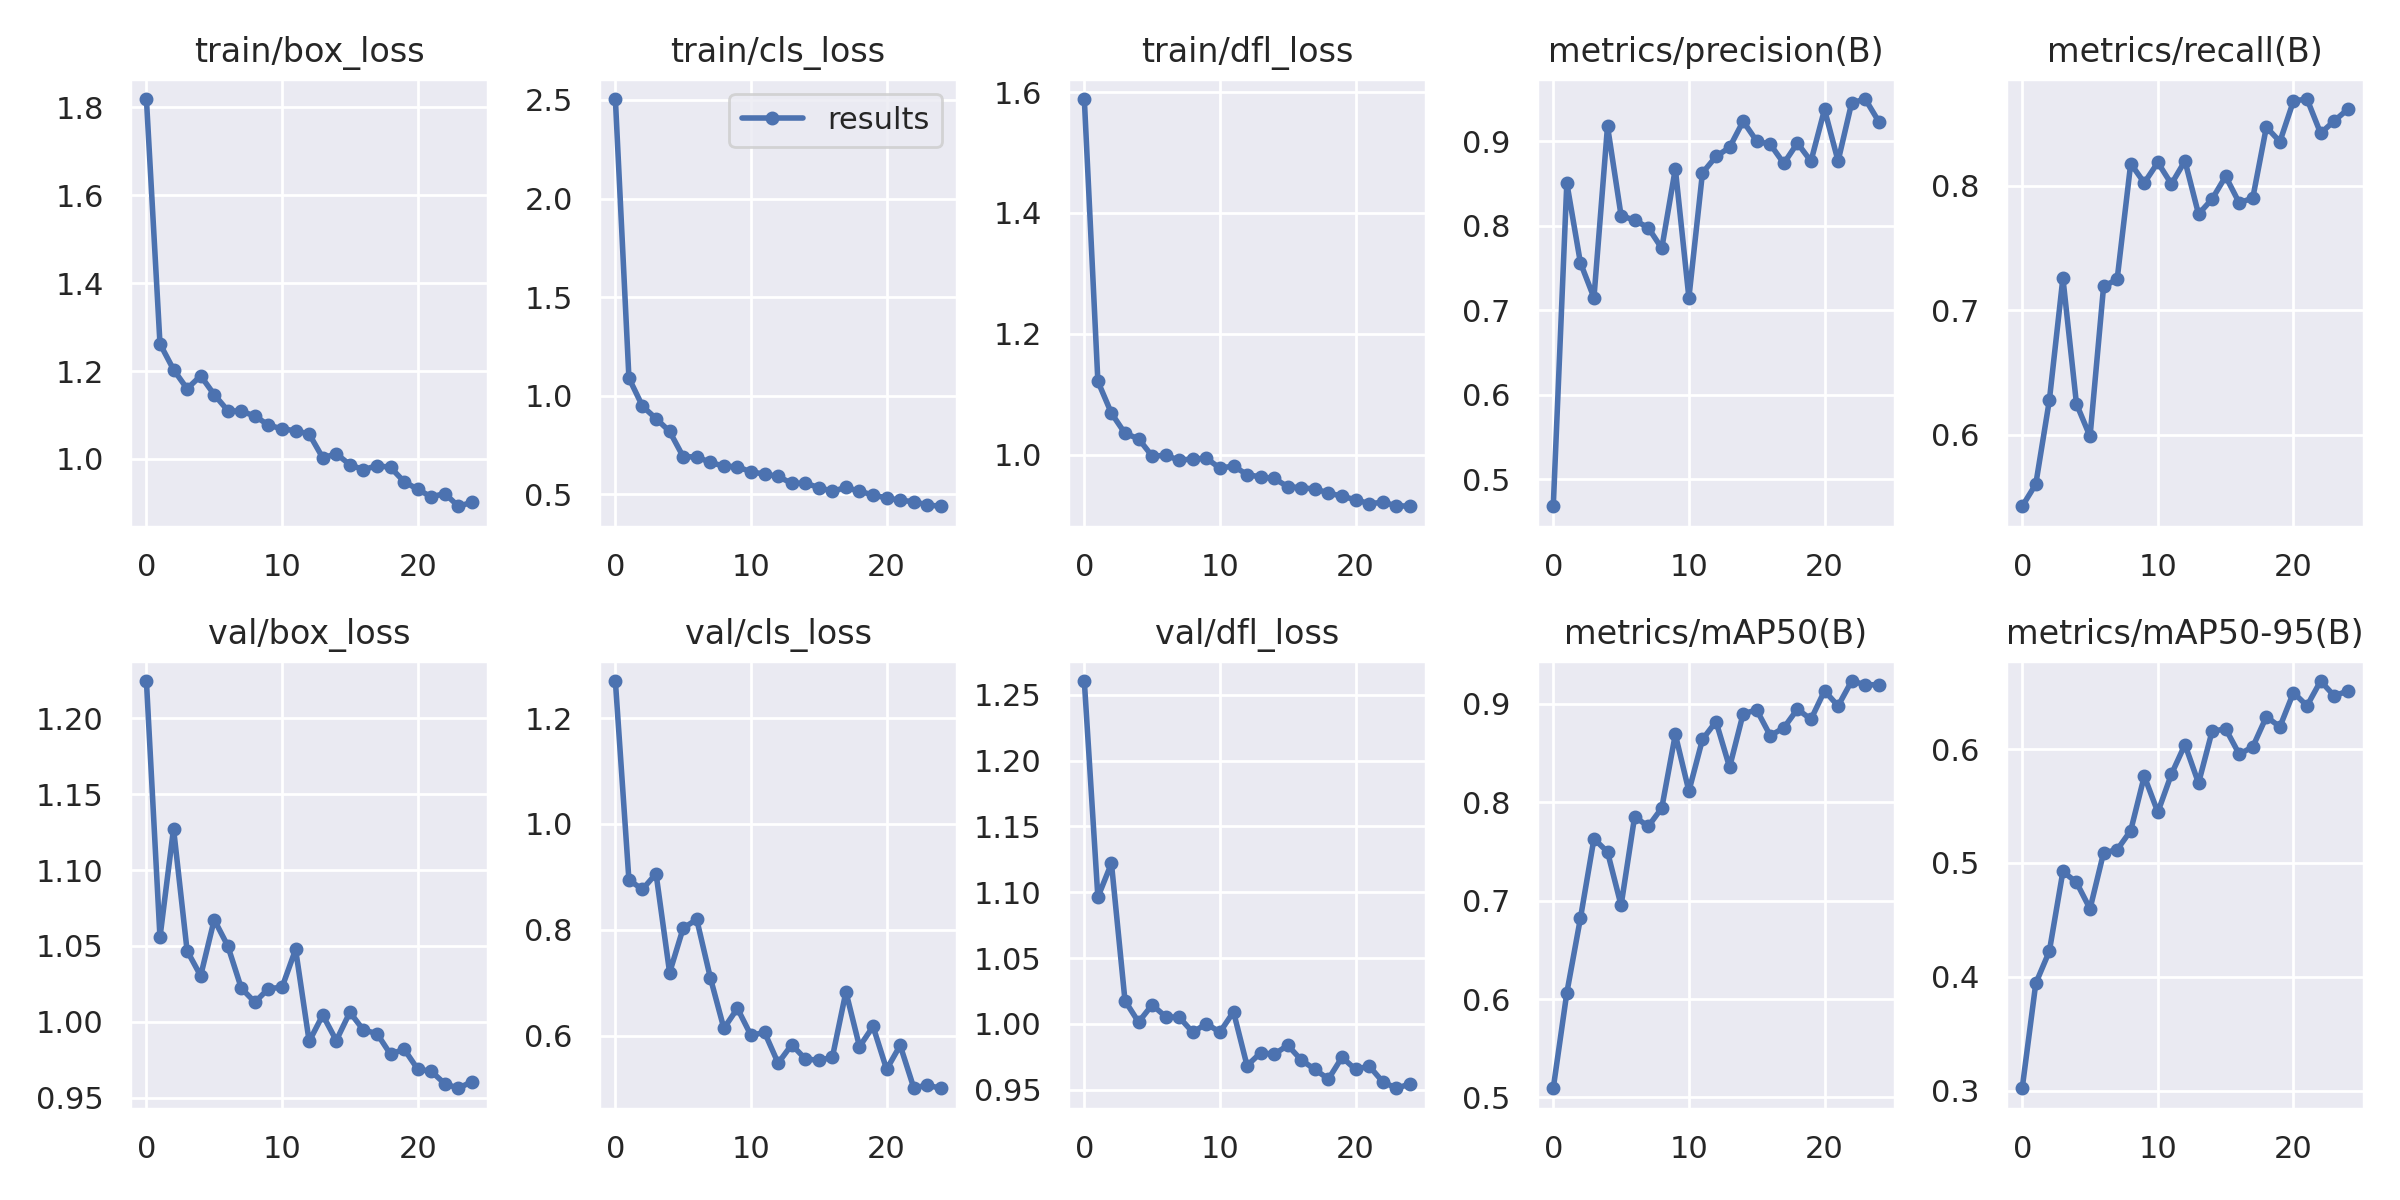

In [ ]:
from IPython.display import Image

Image('/content/runs/detect/train/results.png')

>### (2) Training Results Visualization

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/runs/detect/train/v*.jpg'):
    display(Image(filename=imageName))
    print("\n")

# V. Model Validation

>## 1) Validation 데이터에 best.pt 적용

In [ ]:
!yolo task = detect \
      mode = val \
      model = /content/runs/detect/train/weights/best.pt \
      data = /content/yolo_custom_modeling/dataset/data.yaml

2023-11-29 05:07:39.852792: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 05:07:39.852860: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 05:07:39.852903: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 05:07:41.078658: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/yolo_custom_modeling/dataset/labels.cache... 16

# VI. Model Test

>## 1) Test Directory
 * --source /content/yolo_custom_modeling/dataset/test

In [ ]:
!yolo task = detect \
      mode = predict \
      model = /content/runs/detect/train/weights/best.pt \
      conf = 0.25 \
      source = /content/yolo_custom_modeling/dataset/test \
      save = True

2023-11-29 05:08:06.559778: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 05:08:06.559838: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 05:08:06.559873: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 05:08:07.584499: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/10 /content/yolo_custom_modeling/dataset/test/mask_test_1.png:

>## 2) Results Visualization

In [ ]:
# display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/runs/detect/predict/*.png'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

#
#
#
# The End
#
#
#